## Packages

In [2]:
import os

## Remove the Background

In [18]:
# Change directory to folder with cropped images
os.chdir(r"C:\Users\jawang2\Documents\GitHub\cca_lol\test") 
cwd = os.getcwd() 
print('Directory changed to: ' + cwd)

Directory changed to: C:\Users\jawang2\Documents\GitHub\cca_lol\test


In [5]:
for filename in os.listdir(cwd):
    print(filename)

aatrox-0-Default_Aatrox.png
ahri-10-Popstar_Ahri_Chroma_4.png
aphelios-1-Nightbringer_Aphelios_Chroma_1.png
ekko-14-Trick_or_Treat_Ekko_Chroma_3.png
jayce-13-Battle_Academia_Jayce_Chroma_9.png
malzahar-0-Default_Malzahar.png
poppy-3-Blacksmith_Poppy.png
rengar-19-Pretty_Kitty_Rengar_Chroma_5.png
soraka-1-Dryad_Soraka.png
syndra-3-Queen_of_Diamonds_Syndra.png
taliyah-1-Freljord_Taliyah.png
taric-0-Default_Taric.png
teemo-11-Cottontail_Teemo_Chroma_4.png
teemo-20-Beemo_Chroma_3.png
thresh-14-Pulsefire_Thresh_Prestige_Edition.png
tristana-28-Little_Demon_Tristana_Chroma_5.png


In [13]:
from skimage import io as skio
from skimage import filters

In [44]:
# https://www.remove.bg/profile#credits-plan
# Requires "requests" to be installed (see python-requests.org)
# import requests

# response = requests.post(
#     'https://api.remove.bg/v1.0/removebg',
#     files={'image_file': open('aatrox-0-Default_Aatrox.png', 'rb')},
#     data={'size': 'auto'},
#     headers={'X-Api-Key': 'cj4xuzattc3itq4yyBkUKwpm'},
# )
# if response.status_code == requests.codes.ok:
#     with open('no-bg.png', 'wb') as out:
#         out.write(response.content)
# else:
#     print("Error:", response.status_code, response.text)

In [49]:
# https://stackoverflow.com/questions/60033008/remove-image-background-and-extract-the-object-in-image
import cv2
import numpy as np

# Load image, convert to grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread('aatrox-0-Default_Aatrox.png')
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Obtain bounding rectangle and extract ROI
x,y,w,h = cv2.boundingRect(thresh)
cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
ROI = original[y:y+h, x:x+w]

# Add alpha channel
b,g,r = cv2.split(ROI)
alpha = np.ones(b.shape, dtype=b.dtype) * 50
ROI = cv2.merge([b,g,r,alpha])

cv2.imshow('thresh', thresh)
cv2.imshow('image', image)
cv2.imshow('ROI', ROI)
cv2.waitKey()

-1

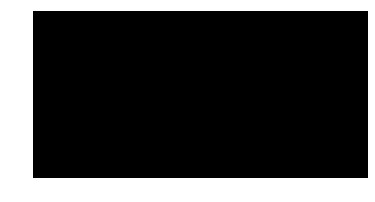

In [55]:
# Load image
image_bgr = cv2.imread('aatrox-0-Default_Aatrox.png')
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Rectange values: start x, start y, width, height
rectangle = (0, 56, 256, 150)
# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run grabCut
cv2.grabCut(image_rgb, # Our image
            mask, # The Mask
            rectangle, # Our rectangle
            bgdModel, # Temporary array for background
            fgdModel, # Temporary array for background
            5, # Number of iterations
            cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle

# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]
# Show image
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

In [61]:
# https://docs.opencv.org/3.4/d1/dc5/tutorial_background_subtraction.html
# - grab screenshot of teemo.gg canvas in same size as the images
# - use background subtraction to create foreground mask!!!!!
# - crop image doing that